# Datacube(NASA POWER Climate Data) to GeoCroissant Conversion Workflow, Metadata Generation

This notebook demonstrates the conversion of NASA POWER climate datacube (Xarray Dataset) to GeoCroissant metadata format for standardized data discovery and FAIR data principles.

<img src="GeoCroissant.jpg" alt="GeoCroissant" width="150" style="float: right; margin-left: 50px;">

## Overview
- **Data Source**: NASA POWER MERRA2 temporal dataset
- **Format**: Zarr datacube stored on AWS S3
- **Variables**: Temperature at 2 Meters (T2M) and other climate variables
- **Coverage**: Global, monthly temporal resolution
- **Output**: GeoCroissant JSON-LD metadata for data cataloging

## Exploring NASA POWER S3 Bucket Structure

This cell lists the contents of the NASA POWER S3 bucket to understand the available datasets.

**Command**: `aws s3 ls --no-sign-request s3://nasa-power/`

**Purpose**: 
- Discover available datasets in the NASA POWER repository
- Understand the bucket organization
- Identify relevant data collections

In [1]:
!aws s3 ls --no-sign-request s3://nasa-power/

                           PRE flashflux/
                           PRE gcc/
                           PRE geosit/
                           PRE grealm/
                           PRE gwm/
                           PRE hydroscs/
                           PRE imerg/
                           PRE merra2/
                           PRE srb/
                           PRE syn1deg/
2024-12-16 18:38:32       2179 CITATION.cff
2024-12-16 18:38:32      18657 LICENSE.txt
2024-04-24 17:25:03     147235 index.html
2025-09-03 17:01:05       4058 last_available.json


## Exploring MERRA2 Data Directory

This cell explores the MERRA2 (Modern-Era Retrospective analysis for Research and Applications, Version 2) directory within the NASA POWER bucket.

**Command**: `aws s3 ls --no-sign-request s3://nasa-power/merra2/`

**Purpose**:
- Navigate to the MERRA2 dataset
- Identify available MERRA2 data products
- Understand the temporal data organization

In [2]:
!aws s3 ls --no-sign-request s3://nasa-power/merra2/

                           PRE spatial/
                           PRE temporal/


## Exploring Temporal Data Directory

This cell examines the temporal data directory within the MERRA2 collection.

**Command**: `aws s3 ls --no-sign-request s3://nasa-power/merra2/temporal/`

**Purpose**:
- Locate temporal climate data products
- Identify monthly temporal datasets
- Understand the data structure for time-series analysis

In [3]:
!aws s3 ls --no-sign-request s3://nasa-power/merra2/temporal/

                           PRE power_merra2_annual_temporal_lst.zarr/
                           PRE power_merra2_annual_temporal_utc.zarr/
                           PRE power_merra2_climatology_temporal_lst.zarr/
                           PRE power_merra2_climatology_temporal_utc.zarr/
                           PRE power_merra2_daily_temporal_lst.zarr/
                           PRE power_merra2_daily_temporal_utc.zarr/
                           PRE power_merra2_hourly_temporal_lst.zarr/
                           PRE power_merra2_hourly_temporal_utc.zarr/
                           PRE power_merra2_monthly_temporal_lst.zarr/
                           PRE power_merra2_monthly_temporal_utc.zarr/


## Checking Dataset Size and Structure

This cell examines the size and structure of the monthly temporal Zarr dataset.

**Purpose**:
- Determine the total size of the dataset
- Understand the storage requirements
- Assess data volume for processing

In [4]:
!aws s3 ls --no-sign-request --recursive s3://nasa-power/merra2/temporal/power_merra2_monthly_temporal_utc.zarr/ --human-readable --summarize | grep -E "Total"

Total Objects: 123676
   Total Size: 46.4 GiB


## Loading NASA POWER Dataset with Xarray

This cell demonstrates how to load the NASA POWER Zarr dataset using Xarray.


**Purpose**:
- Load the Zarr dataset into memory
- Create an Xarray Dataset object for analysis
- Enable access to climate variables and metadata

In [5]:
import xarray as xr

store = "s3://nasa-power/merra2/temporal/power_merra2_monthly_temporal_utc.zarr/"
ds = xr.open_zarr(store, storage_options={"anon": True})

ds

<xarray.Dataset>
Dimensions:          (time: 588, lat: 361, lon: 576)
Coordinates:
  * lat              (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * lon              (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * time             (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2029-12-31
Data variables: (12/472)
    CDD0             (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    CDD10            (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    CDD18_3          (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    DISPH            (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    EVLAND           (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    EVLAND_00        (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    ...               ...
    WS50M_MAX        (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    WS50M_MAX_AVG    (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    WS50M_MIN        (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    WS50M_MIN_AVG    (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    WS50M_RANGE      (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    Z0M              (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
Attributes: (12/37)
    acknowledgement:            The Prediction of Worldwide Energy Resources ...
    comment:                    POWER data version 10.0.0 uses the source dat...
    conventions:                CF-1.8, ACDD-1.3
    creator_email:              bradley.macpherson@nasa.gov
    creator_name:               Bradley Macpherson
    date_created:               2024-08-19T08:32:59Z
    ...                         ...
    time_coverage_end:          2029-12-31T00:00:00
    time_coverage_resolution:   P1ME
    time_coverage_start:        1981-01-01T00:00:00
    time_standard:              Universal Time Coordinated (UTC)
    title:                      POWER Universal Time Coordinated (UTC) Time S...
    version:                    POWER Version 10.0.0

## Exploring Dataset Structure and Metadata

This cell examines the dataset structure, global attributes, and variable metadata.


**Purpose**:
- Understand dataset dimensions and variables
- Access global metadata and attributes
- Examine variable-specific metadata
- Learn about data types and units

In [6]:
print(ds)  # Summary of dataset
print(ds.attrs)  # Global metadata
print(ds.T2M)  # Inspect one variable
print(ds.T2M.attrs)  # Variable-specific metadata

<xarray.Dataset>
Dimensions:          (time: 588, lat: 361, lon: 576)
Coordinates:
  * lat              (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * lon              (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * time             (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2029-12-31
Data variables: (12/472)
    CDD0             (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    CDD10            (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    CDD18_3          (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    DISPH            (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    EVLAND           (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    EVLAND_00        (time, lat, lon) float32 dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    ...               ...
    WS50M_MAX        (time, lat, lon

## Visualizing Temperature Data

This cell creates a basic visualization of the Temperature at 2 Meters (T2M) variable for the first time step.

**Purpose**:
- Create a spatial map of temperature data
- Visualize the global temperature distribution
- Understand the data coverage and resolution

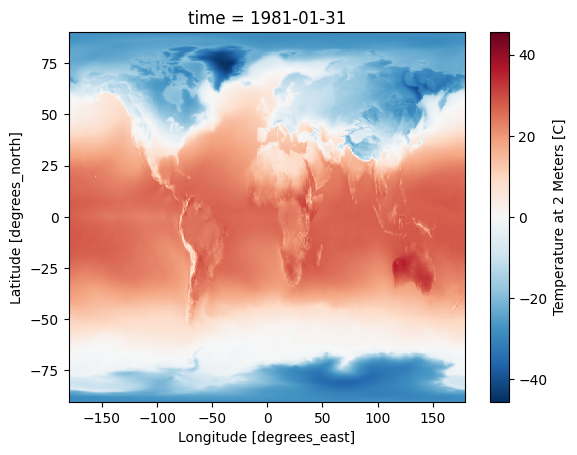

In [7]:
ds.T2M.isel(time=0).plot()

## GeoCroissant Metadata Generation Functions

This cell contains comprehensive functions for converting Xarray datasets to GeoCroissant JSON-LD metadata format.

**Key Functions**:
- `_infer_data_type()`: Maps numpy dtypes to GeoCroissant data types
- `_validate_coordinates()`: Extracts and validates coordinate information
- `clean_name()`: Sanitizes names for GeoCroissant compatibility
- `clean_dataset_attributes()`: Validates and cleans dataset attributes
- `generate_checksum()`: Creates SHA256 checksums for data integrity
- `datacube_to_geocroissant()`: Main conversion function
- `save_geocroissant_metadata()`: Saves metadata to JSON file

**Purpose**:
- Enable standardized data discovery
- Provide comprehensive metadata for climate datasets
- Support FAIR data principles
- Facilitate data cataloging and sharing

## Displaying Generated GeoCroissant Metadata

This cell reads and displays the generated GeoCroissant metadata in a formatted JSON structure.


**Purpose**:
- Review the generated metadata structure
- Verify metadata completeness
- Understand the GeoCroissant schema implementation

In [8]:
import json
import xarray as xr
import calendar
import hashlib
from typing import Optional, Dict, Any


class T2MCroissantConverter:
    """NASA POWER T2M data for the year 2020 to GeoCroissant format"""

    def __init__(
        self,
        zarr_url: str = "s3://nasa-power/merra2/temporal/power_merra2_monthly_temporal_utc.zarr/",
    ):
        """
        Initialize the converter with the Zarr URL

        Args:
            zarr_url: URL to the NASA POWER Zarr dataset
        """
        self.zarr_url = zarr_url
        self.ds_full = None
        self.ds_2020 = None
        self.variable = "T2M"
        self.year = 2020

    def load_dataset(self) -> bool:
        """Load the full dataset from S3 and subset T2M for 2020"""
        try:
            print(f"Loading NASA POWER dataset from {self.zarr_url}...")
            self.ds_full = xr.open_zarr(self.zarr_url, storage_options={"anon": True})
            # Subset for 2020 only
            self.ds_2020 = self.ds_full.sel(
                time=slice(f"{self.year}-01-01", f"{self.year}-12-31")
            )
            print(f"Dataset loaded successfully!")
            print(f"  - Dimensions: {self.ds_2020.dims}")
            print(f"  - T2M shape: {self.ds_2020[self.variable].shape}")
            print(
                f"  - Time range: {self.ds_2020.time.values[0]} to {self.ds_2020.time.values[-1]}"
            )
            return True
        except Exception as e:
            print(f"Error loading dataset: {e}")
            return False

    def generate_checksum(self, content: str) -> str:
        """Generate MD5 checksum for content"""
        return hashlib.md5(content.encode("utf-8")).hexdigest()

    def create_croissant_metadata(
        self, output_file: str = "T2M_2020_croissant.json"
    ) -> Dict[str, Any]:
        """
        Create GeoCroissant metadata for the T2M 2020 data

        Args:
            output_file: Output file path

        Returns:
            dict: GeoCroissant metadata
        """
        if self.ds_2020 is None:
            print("Error: No 2020 data available. Call load_dataset() first.")
            return {}

        t2m_data = self.ds_2020[self.variable]
        var_metadata = {
            "long_name": t2m_data.attrs.get("long_name", "Temperature at 2 Meters"),
            "units": t2m_data.attrs.get("units", "C"),
            "valid_min": t2m_data.attrs.get("valid_min", -125.0),
            "valid_max": t2m_data.attrs.get("valid_max", 80.0),
            "standard_name": t2m_data.attrs.get(
                "standard_name", "Temperature_at_2_Meters"
            ),
            "definition": t2m_data.attrs.get(
                "definition",
                "The average air (dry bulb) temperature at 2 meters above the surface of the earth.",
            ),
            "status": t2m_data.attrs.get("status", "official"),
            "significant_digits": t2m_data.attrs.get("significant_digits", 2),
            "cell_methods": t2m_data.attrs.get("cell_methods", "time: mean"),
        }

        # Calculate sizes
        total_size_gb = self.ds_2020.nbytes / 1e9
        t2m_size_mb = t2m_data.nbytes / 1e6
        monthly_size_mb = t2m_size_mb / 12

        # Generate checksum
        hash_input = f"{self.zarr_url}{self.year}{self.variable}"
        md5_hash = self.generate_checksum(hash_input)

        croissant = {
            "@context": {
                "@language": "en",
                "@vocab": "https://schema.org/",
                "citeAs": "cr:citeAs",
                "column": "cr:column",
                "conformsTo": "dct:conformsTo",
                "cr": "http://mlcommons.org/croissant/",
                "geocr": "http://mlcommons.org/croissant/geocr/",
                "rai": "http://mlcommons.org/croissant/RAI/",
                "dct": "http://purl.org/dc/terms/",
                "sc": "https://schema.org/",
                "data": {"@id": "cr:data", "@type": "@json"},
                "examples": {"@id": "cr:examples", "@type": "@json"},
                "dataBiases": "cr:dataBiases",
                "dataCollection": "cr:dataCollection",
                "dataType": {"@id": "cr:dataType", "@type": "@vocab"},
                "extract": "cr:extract",
                "field": "cr:field",
                "fileProperty": "cr:fileProperty",
                "fileObject": "cr:fileObject",
                "fileSet": "cr:fileSet",
                "format": "cr:format",
                "includes": "cr:includes",
                "isLiveDataset": "cr:isLiveDataset",
                "jsonPath": "cr:jsonPath",
                "key": "cr:key",
                "md5": "cr:md5",
                "parentField": "cr:parentField",
                "path": "cr:path",
                "personalSensitiveInformation": "cr:personalSensitiveInformation",
                "recordSet": "cr:recordSet",
                "references": "cr:references",
                "regex": "cr:regex",
                "repeated": "cr:repeated",
                "replace": "cr:replace",
                "samplingRate": "cr:samplingRate",
                "separator": "cr:separator",
                "source": "cr:source",
                "subField": "cr:subField",
                "transform": "cr:transform",
            },
            "@type": "sc:Dataset",
            "name": "NASA-POWER-T2M-Monthly-Time-Series-2020",
            "alternateName": ["nasa-power-t2m-2020", "POWER-T2M-2020"],
            "description": (
                "Monthly time series of Temperature at 2 Meters (T2M) for 2020 from NASA POWER dataset. This dataset provides global temperature data at 0.5° latitude and 0.625° longitude resolution with monthly temporal resolution."
            ),
            "conformsTo": "http://mlcommons.org/croissant/1.0",
            "version": "1.0.0",
            "url": "https://power.larc.nasa.gov",
            "license": "https://creativecommons.org/licenses/by/4.0/",
            "creator": {
                "@type": "Organization",
                "name": "NASA Langley Research Center (LaRC)",
                "url": "https://power.larc.nasa.gov",
            },
            "keywords": [
                "Temperature",
                "Climate",
                "NASA",
                "POWER",
                "2020",
                "Monthly",
                "Geospatial",
                "Earth Science",
                "Meteorology",
                "Climate Data",
            ],
            "citeAs": (
                "NASA POWER Project. Prediction Of Worldwide Energy Resource (POWER) Project. NASA Langley Research Center."
            ),
            "geocr:BoundingBox": [
                self.ds_full.attrs.get("geospatial_lon_min", -180.0),
                self.ds_full.attrs.get("geospatial_lat_min", -90.0),
                self.ds_full.attrs.get("geospatial_lon_max", 180.0),
                self.ds_full.attrs.get("geospatial_lat_max", 90.0),
            ],
            "geocr:temporalExtent": {
                "startDate": "2020-01-01T00:00:00Z",
                "endDate": "2020-12-31T23:59:59Z",
            },
            "geocr:spatialResolution": "0.5° lat × 0.625° lon",
            "geocr:coordinateReferenceSystem": "EPSG:4326",
            "geocr:mlTask": {
                "@type": "geocr:Regression",
                "taskType": "climate_prediction",
                "evaluationMetric": "RMSE",
                "applicationDomain": "climate_monitoring",
            },
            "distribution": [
                {
                    "@type": "cr:FileObject",
                    "@id": "zarr-store-t2m-2020",
                    "name": "zarr-store-t2m-2020",
                    "description": (
                        "Zarr datacube for NASA POWER T2M data for the year 2020"
                    ),
                    "contentUrl": self.zarr_url,
                    "encodingFormat": "application/x-zarr",
                    "md5": md5_hash,
                }
            ],
            "datePublished": "2020-12-31",
            "recordSet": [
                {
                    "@type": "cr:RecordSet",
                    "@id": "nasa_power_t2m_2020",
                    "name": "nasa_power_t2m_2020",
                    "description": "NASA POWER T2M climate data for the year 2020",
                    "field": [],
                }
            ],
        }

        # Add fields
        fields = croissant["recordSet"][0]["field"]

        # Add coordinate fields
        for coord_name, coord in self.ds_2020.coords.items():
            coord_field = {
                "@type": "cr:Field",
                "@id": f"nasa_power_t2m_2020/{coord_name}",
                "name": f"nasa_power_t2m_2020/{coord_name}",
                "description": f"Coordinate: {coord_name}",
                "dataType": "sc:Float" if coord.dtype.kind == "f" else "sc:Date",
                "source": {
                    "fileObject": {"@id": "zarr-store-t2m-2020"},
                    "extract": {"jsonPath": f"$.{coord_name}"},
                },
                "geocr:dataShape": list(coord.shape),
                "geocr:validRange": (
                    {
                        "min": (
                            -90.0
                            if coord_name == "lat"
                            else -180.0 if coord_name == "lon" else None
                        ),
                        "max": (
                            90.0
                            if coord_name == "lat"
                            else 180.0 if coord_name == "lon" else None
                        ),
                    }
                    if coord_name in ["lat", "lon"]
                    else None
                ),
                "geocr:units": (
                    "degrees_north"
                    if coord_name == "lat"
                    else "degrees_east" if coord_name == "lon" else None
                ),
            }
            # Remove None values
            coord_field = {k: v for k, v in coord_field.items() if v is not None}
            fields.append(coord_field)

        # Main T2M field
        main_field = {
            "@type": "cr:Field",
            "@id": "nasa_power_t2m_2020/T2M",
            "name": "nasa_power_t2m_2020/T2M",
            "description": var_metadata["long_name"],
            "dataType": "sc:Float",
            "source": {
                "fileObject": {"@id": "zarr-store-t2m-2020"},
                "extract": {"jsonPath": "$.T2M"},
            },
            "geocr:dataShape": list(t2m_data.shape),
            "geocr:validRange": {
                "min": float(var_metadata["valid_min"]),
                "max": float(var_metadata["valid_max"]),
            },
            "geocr:units": var_metadata["units"],
            "geocr:standardName": var_metadata["standard_name"],
            "geocr:definition": var_metadata["definition"],
            "geocr:cellMethods": var_metadata["cell_methods"],
        }
        fields.append(main_field)

        # Save metadata
        with open(output_file, "w", encoding="utf-8") as f:
            json.dump(croissant, f, indent=2, ensure_ascii=False)

        print(f"GeoCroissant metadata saved to {output_file}")
        print(f"Total fields: {len(fields)}")

        return croissant

    def convert(self, output_file: str = "T2M_2020_croissant.json") -> Dict[str, Any]:
        """
        Complete conversion pipeline for T2M 2020

        Args:
            output_file: Output file path

        Returns:
            dict: GeoCroissant metadata
        """
        print(f"Starting conversion for T2M {self.year}...")
        if not self.load_dataset():
            return {}

        metadata = self.create_croissant_metadata(output_file)
        print("Conversion completed successfully!")
        return metadata


# Example usage in notebook:
converter = T2MCroissantConverter()
metadata = converter.convert()

Starting conversion for T2M 2020...
Loading NASA POWER dataset from s3://nasa-power/merra2/temporal/power_merra2_monthly_temporal_utc.zarr/...
Dataset loaded successfully!
  - Dimensions: Frozen({'time': 12, 'lat': 361, 'lon': 576})
  - T2M shape: (12, 361, 576)
  - Time range: 2020-01-31T00:00:00.000000000 to 2020-12-31T00:00:00.000000000
GeoCroissant metadata saved to T2M_2020_croissant.json
Total fields: 4
Conversion completed successfully!


In [9]:
import json

# Read and print the metadata
with open("T2M_2020_croissant.json", "r") as f:
    metadata = json.load(f)

# Pretty print the metadata
print(json.dumps(metadata, indent=2))

{
  "@context": {
    "@language": "en",
    "@vocab": "https://schema.org/",
    "citeAs": "cr:citeAs",
    "column": "cr:column",
    "conformsTo": "dct:conformsTo",
    "cr": "http://mlcommons.org/croissant/",
    "geocr": "http://mlcommons.org/croissant/geocr/",
    "rai": "http://mlcommons.org/croissant/RAI/",
    "dct": "http://purl.org/dc/terms/",
    "sc": "https://schema.org/",
    "data": {
      "@id": "cr:data",
      "@type": "@json"
    },
    "examples": {
      "@id": "cr:examples",
      "@type": "@json"
    },
    "dataBiases": "cr:dataBiases",
    "dataCollection": "cr:dataCollection",
    "dataType": {
      "@id": "cr:dataType",
      "@type": "@vocab"
    },
    "extract": "cr:extract",
    "field": "cr:field",
    "fileProperty": "cr:fileProperty",
    "fileObject": "cr:fileObject",
    "fileSet": "cr:fileSet",
    "format": "cr:format",
    "includes": "cr:includes",
    "isLiveDataset": "cr:isLiveDataset",
    "jsonPath": "cr:jsonPath",
    "key": "cr:key",
   

## Validating GeoCroissant Metadata

This cell validates the generated GeoCroissant metadata using the mlcroissant validation tool.

**Purpose**:
- Ensure metadata compliance with GeoCroissant schema
- Identify any validation errors or warnings
- Verify metadata quality and completeness

In [10]:
!mlcroissant validate --jsonld=T2M_2020_croissant.json

I0903 19:06:09.589282 123634035286400 validate.py:53] Done.


## Temperature Data Visualization

### Single Month Temperature Plot
This cell creates enhanced visualizations of temperature data for specific months using the GeoCroissant metadata.

**Features**:
- Enhanced styling with RdBu_r colormap
- Metadata information display
- Statistical summaries
- Professional visualization formatting

Loading data for month 1...


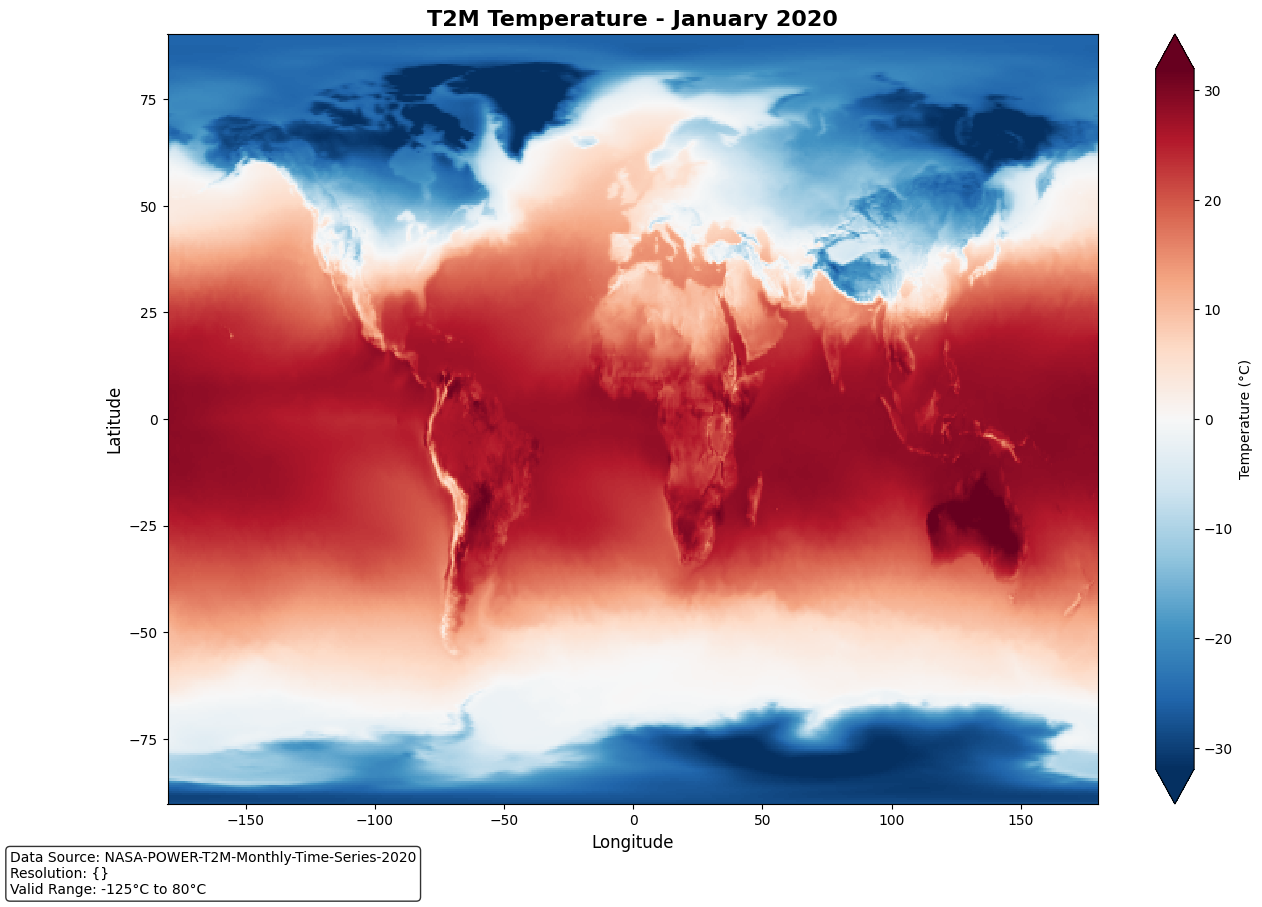


January Statistics:
  Mean: 4.21°C
  Min: -41.95°C
  Max: 35.23°C
  Std: 19.88°C


In [11]:
import json
import xarray as xr
import matplotlib.pyplot as plt


def plot_temperature(metadata_file: str = "T2M_2020_croissant.json", month: int = 1):
    """Plot temperature for a specific month using croissant metadata."""

    # Load metadata
    with open(metadata_file, "r", encoding="utf-8") as f:
        metadata = json.load(f)

    # Get Zarr URL
    zarr_url = None
    for dist in metadata.get("distribution", []):
        if dist.get("encodingFormat") == "application/x-zarr":
            zarr_url = dist.get("contentUrl", "")
            break

    if not zarr_url:
        raise ValueError("No Zarr URL found in metadata")

    # Load data
    print(f"Loading data for month {month}...")
    ds_full = xr.open_zarr(zarr_url, storage_options={"anon": True})
    ds_2020 = ds_full.sel(time=slice("2020-01-01", "2020-12-31"))
    month_data = ds_2020["T2M"].isel(time=month - 1)

    # Get month metadata
    month_names = [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ]

    # Create enhanced plot
    plt.figure(figsize=(15, 10))

    # Plot temperature map with enhanced styling
    im = month_data.plot(
        cmap="RdBu_r", cbar_kwargs={"label": "Temperature (°C)"}, robust=True
    )

    # Add title and labels with better styling
    plt.title(
        f"T2M Temperature - {month_names[month-1]} 2020", fontsize=16, fontweight="bold"
    )
    plt.xlabel("Longitude", fontsize=12)
    plt.ylabel("Latitude", fontsize=12)

    # Add metadata info box
    info_text = f"Data Source: {metadata.get('name')}\n"
    info_text += f"Resolution: {metadata.get('coordinateSystem', {}).get('spatialResolution', {})}\n"
    info_text += f"Valid Range: -125°C to 80°C"

    plt.figtext(
        0.02,
        0.02,
        info_text,
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
    )

    plt.show()

    # Print enhanced statistics
    print(f"\n{month_names[month-1]} Statistics:")
    print(f"  Mean: {float(month_data.mean()):.2f}°C")
    print(f"  Min: {float(month_data.min()):.2f}°C")
    print(f"  Max: {float(month_data.max()):.2f}°C")
    print(f"  Std: {float(month_data.std()):.2f}°C")


# Usage
if __name__ == "__main__":
    plot_temperature(month=1)  # Plot January

# Dynamic NASA POWER to GeoCroissant Converter

## Overview
This notebook demonstrates how to use the DynamicCroissantConverter to generate GeoCroissant metadata for NASA POWER climate data with flexible time and variable selection.

## Features
-  User-specified year and month selection
-  Variable selection (all 472 variables available)
-  Dynamic metadata generation
-  Valid GeoCroissant format output

In [12]:
import json
import xarray as xr
import calendar
import hashlib
from datetime import datetime
from typing import Optional, Dict, Any, Tuple

"""
Dynamic GeoCroissant Converter for NASA POWER Data
Allows users to specify year and month to generate metadata for specific time periods
"""

import json
import xarray as xr
import calendar
import hashlib
from typing import Optional, Dict, Any


class DynamicCroissantConverter:
    """Dynamic converter for NASA POWER data to GeoCroissant format"""

    def __init__(
        self,
        zarr_url: str = "s3://nasa-power/merra2/temporal/power_merra2_monthly_temporal_utc.zarr/",
    ):
        """
        Initialize the converter with the Zarr URL

        Args:
            zarr_url: URL to the NASA POWER Zarr dataset
        """
        self.zarr_url = zarr_url
        self.ds_full = None
        self.ds_subset = None

    def load_dataset(self) -> bool:
        """Load the full dataset from S3"""
        try:
            print(f"Loading NASA POWER dataset from {self.zarr_url}...")
            self.ds_full = xr.open_zarr(self.zarr_url, storage_options={"anon": True})
            print(f"Dataset loaded successfully!")
            print(f"  - Dimensions: {self.ds_full.dims}")
            print(f"  - Total size: {self.ds_full.nbytes / 1e9:.2f} GB")
            print(f"  - Variables: {len(self.ds_full.data_vars)}")
            print(
                f"  - Time range: {self.ds_full.time.values[0]} to {self.ds_full.time.values[-1]}"
            )
            return True
        except Exception as e:
            print(f"Error loading dataset: {e}")
            return False

    def get_available_variables(self) -> Dict[str, Any]:
        """Get list of available variables with their metadata"""
        if not self.ds_full:
            return {}

        variables = {}
        for var_name, var in self.ds_full.data_vars.items():
            variables[var_name] = {
                "shape": list(var.shape),
                "dimensions": list(var.dims),
                "dtype": str(var.dtype),
                "size_mb": float(var.nbytes / 1e6),
                "attributes": (
                    dict(var.attrs) if hasattr(var, "attrs") and var.attrs else {}
                ),
            }
        return variables

    def subset_data(
        self, year: int, month: Optional[int] = None, variables: Optional[list] = None
    ) -> bool:
        """
        Subset the data for specific year/month and variables

        Args:
            year: Year to extract (e.g., 2020)
            month: Month to extract (1-12), if None extracts entire year
            variables: List of variable names to include, if None includes all

        Returns:
            bool: True if successful, False otherwise
        """
        if not self.ds_full:
            print("Error: Dataset not loaded. Call load_dataset() first.")
            return False

        try:
            # Create time slice
            if month:
                # Single month
                start_date = f"{year}-{month:02d}-01"
                end_date = f"{year}-{month:02d}-{calendar.monthrange(year, month)[1]}"
                time_slice = slice(start_date, end_date)
                print(f"Extracting data for {calendar.month_name[month]} {year}...")
            else:
                # Entire year
                start_date = f"{year}-01-01"
                end_date = f"{year}-12-31"
                time_slice = slice(start_date, end_date)
                print(f"Extracting data for entire year {year}...")

            # Subset by time
            self.ds_subset = self.ds_full.sel(time=time_slice)

            # Subset by variables if specified
            if variables:
                available_vars = [
                    var for var in variables if var in self.ds_subset.data_vars
                ]
                if available_vars:
                    self.ds_subset = self.ds_subset[available_vars]
                    print(f"  - Selected variables: {available_vars}")
                else:
                    print(
                        f"  - Warning: None of the specified variables found. Using all variables."
                    )

            print(f"  - Subset dimensions: {self.ds_subset.dims}")
            print(f"  - Subset size: {self.ds_subset.nbytes / 1e9:.2f} GB")
            print(f"  - Variables in subset: {len(self.ds_subset.data_vars)}")

            return True

        except Exception as e:
            print(f"Error subsetting data: {e}")
            return False

    def generate_checksum(self, content: str) -> str:
        """Generate MD5 checksum for content"""
        return hashlib.md5(content.encode("utf-8")).hexdigest()

    def create_croissant_metadata(
        self, year: int, month: Optional[int] = None, output_file: Optional[str] = None
    ) -> Dict[str, Any]:
        """
        Create GeoCroissant metadata for the subset data

        Args:
            year: Year of the data
            month: Month of the data (if None, entire year)
            output_file: Output file path (if None, auto-generated)

        Returns:
            dict: GeoCroissant metadata
        """
        if not self.ds_subset:
            print("Error: No subset data available. Call subset_data() first.")
            return {}

        # Generate output filename if not provided
        if not output_file:
            if month:
                output_file = f"NASA_POWER_{year}_{month:02d}_croissant.json"
            else:
                output_file = f"NASA_POWER_{year}_croissant.json"

        # Generate checksum
        hash_input = f"{self.zarr_url}{year}{month if month else 'year'}"
        md5_hash = self.generate_checksum(hash_input)

        # Create time extent
        if month:
            start_date = f"{year}-{month:02d}-01T00:00:00Z"
            end_date = (
                f"{year}-{month:02d}-{calendar.monthrange(year, month)[1]}T23:59:59Z"
            )
            temporal_resolution = "P1M"
            duration = "P1M"
            description_suffix = f"for {calendar.month_name[month]} {year}"
        else:
            start_date = f"{year}-01-01T00:00:00Z"
            end_date = f"{year}-12-31T23:59:59Z"
            temporal_resolution = "P1M"
            duration = "P1Y"
            description_suffix = f"for the year {year}"

        # Create GeoCroissant metadata
        croissant = {
            "@context": {
                "@language": "en",
                "@vocab": "https://schema.org/",
                "citeAs": "cr:citeAs",
                "column": "cr:column",
                "conformsTo": "dct:conformsTo",
                "cr": "http://mlcommons.org/croissant/",
                "geocr": "http://mlcommons.org/croissant/geocr/",
                "rai": "http://mlcommons.org/croissant/RAI/",
                "dct": "http://purl.org/dc/terms/",
                "sc": "https://schema.org/",
                "data": {"@id": "cr:data", "@type": "@json"},
                "examples": {"@id": "cr:examples", "@type": "@json"},
                "dataBiases": "cr:dataBiases",
                "dataCollection": "cr:dataCollection",
                "dataType": {"@id": "cr:dataType", "@type": "@vocab"},
                "extract": "cr:extract",
                "field": "cr:field",
                "fileProperty": "cr:fileProperty",
                "fileObject": "cr:fileObject",
                "fileSet": "cr:fileSet",
                "format": "cr:format",
                "includes": "cr:includes",
                "isLiveDataset": "cr:isLiveDataset",
                "jsonPath": "cr:jsonPath",
                "key": "cr:key",
                "md5": "cr:md5",
                "parentField": "cr:parentField",
                "path": "cr:path",
                "personalSensitiveInformation": "cr:personalSensitiveInformation",
                "recordSet": "cr:recordSet",
                "references": "cr:references",
                "regex": "cr:regex",
                "repeated": "cr:repeated",
                "replace": "cr:replace",
                "samplingRate": "cr:samplingRate",
                "separator": "cr:separator",
                "source": "cr:source",
                "subField": "cr:subField",
                "transform": "cr:transform",
            },
            "@type": "sc:Dataset",
            "name": f"NASA-POWER-Climate-Data-{description_suffix.replace(' ', '-')}",
            "alternateName": [
                f"nasa-power-{year}-{month:02d}" if month else f"nasa-power-{year}",
                f"POWER-{year}-{month:02d}" if month else f"POWER-{year}",
            ],
            "description": (
                f"NASA POWER climate dataset {description_suffix}. This dataset provides global climate data at 0.5° latitude and 0.625° longitude resolution with monthly temporal resolution."
            ),
            "conformsTo": "http://mlcommons.org/croissant/1.0",
            "version": "1.0.0",
            "creator": {
                "@type": "Organization",
                "name": "NASA Langley Research Center (LaRC)",
                "url": "https://power.larc.nasa.gov",
            },
            "url": "https://power.larc.nasa.gov",
            "keywords": [
                "Climate",
                "NASA",
                "POWER",
                str(year),
                "Monthly" if month else "Annual",
                "Geospatial",
                "Earth Science",
                "Meteorology",
                "Climate Data",
            ],
            "citeAs": (
                "NASA POWER Project. Prediction Of Worldwide Energy Resource (POWER) Project. NASA Langley Research Center."
            ),
            "datePublished": (
                f"{year}-12-31"
                if not month
                else f"{year}-{month:02d}-{calendar.monthrange(year, month)[1]}"
            ),
            "license": "https://creativecommons.org/licenses/by/4.0/",
            "geocr:BoundingBox": [
                self.ds_full.attrs.get("geospatial_lon_min", -180.0),
                self.ds_full.attrs.get("geospatial_lat_min", -90.0),
                self.ds_full.attrs.get("geospatial_lon_max", 180.0),
                self.ds_full.attrs.get("geospatial_lat_max", 90.0),
            ],
            "geocr:temporalExtent": {"startDate": start_date, "endDate": end_date},
            "geocr:spatialResolution": "0.5° lat × 0.625° lon",
            "geocr:coordinateReferenceSystem": "EPSG:4326",
            "geocr:mlTask": {
                "@type": "geocr:Regression",
                "taskType": "climate_prediction",
                "evaluationMetric": "RMSE",
                "applicationDomain": "climate_monitoring",
            },
            "distribution": [
                {
                    "@type": "cr:FileObject",
                    "@id": (
                        f"zarr-store-{year}-{month:02d}"
                        if month
                        else f"zarr-store-{year}"
                    ),
                    "name": (
                        f"zarr-store-{year}-{month:02d}"
                        if month
                        else f"zarr-store-{year}"
                    ),
                    "description": (
                        f"Zarr datacube for NASA POWER data {description_suffix}"
                    ),
                    "contentUrl": self.zarr_url,
                    "encodingFormat": "application/x-zarr",
                    "md5": md5_hash,
                }
            ],
            "recordSet": [
                {
                    "@type": "cr:RecordSet",
                    "@id": (
                        f"nasa_power_data_{year}_{month:02d}"
                        if month
                        else f"nasa_power_data_{year}"
                    ),
                    "name": (
                        f"nasa_power_data_{year}_{month:02d}"
                        if month
                        else f"nasa_power_data_{year}"
                    ),
                    "description": f"NASA POWER climate data {description_suffix}",
                    "field": [],
                }
            ],
        }

        # Add fields for each variable
        fields = croissant["recordSet"][0]["field"]

        # Add coordinate fields
        for coord_name, coord in self.ds_subset.coords.items():
            coord_field = {
                "@type": "cr:Field",
                "@id": (
                    f"nasa_power_data_{year}_{month:02d}/{coord_name}"
                    if month
                    else f"nasa_power_data_{year}/{coord_name}"
                ),
                "name": (
                    f"nasa_power_data_{year}_{month:02d}/{coord_name}"
                    if month
                    else f"nasa_power_data_{year}/{coord_name}"
                ),
                "description": f"Coordinate: {coord_name}",
                "dataType": "sc:Float" if coord.dtype.kind == "f" else "sc:Date",
                "source": {
                    "fileObject": {
                        "@id": (
                            f"zarr-store-{year}-{month:02d}"
                            if month
                            else f"zarr-store-{year}"
                        )
                    },
                    "extract": {"jsonPath": f"$.{coord_name}"},
                },
                "geocr:dataShape": list(coord.shape),
                "geocr:validRange": (
                    {
                        "min": (
                            -90.0
                            if coord_name == "lat"
                            else -180.0 if coord_name == "lon" else None
                        ),
                        "max": (
                            90.0
                            if coord_name == "lat"
                            else 180.0 if coord_name == "lon" else None
                        ),
                    }
                    if coord_name in ["lat", "lon"]
                    else None
                ),
                "geocr:units": (
                    "degrees_north"
                    if coord_name == "lat"
                    else "degrees_east" if coord_name == "lon" else None
                ),
            }
            # Remove None values
            coord_field = {k: v for k, v in coord_field.items() if v is not None}
            fields.append(coord_field)

        # Add data variable fields
        for var_name, var in self.ds_subset.data_vars.items():
            var_field = {
                "@type": "cr:Field",
                "@id": (
                    f"nasa_power_data_{year}_{month:02d}/{var_name}"
                    if month
                    else f"nasa_power_data_{year}/{var_name}"
                ),
                "name": (
                    f"nasa_power_data_{year}_{month:02d}/{var_name}"
                    if month
                    else f"nasa_power_data_{year}/{var_name}"
                ),
                "description": var.attrs.get("long_name", var_name),
                "dataType": "sc:Float",
                "source": {
                    "fileObject": {
                        "@id": (
                            f"zarr-store-{year}-{month:02d}"
                            if month
                            else f"zarr-store-{year}"
                        )
                    },
                    "extract": {"jsonPath": f"$.{var_name}"},
                },
                "geocr:dataShape": list(var.shape),
                "geocr:validRange": (
                    {
                        "min": float(var.attrs.get("valid_min", 0.0)),
                        "max": float(var.attrs.get("valid_max", 100.0)),
                    }
                    if var.attrs.get("valid_min") is not None
                    and var.attrs.get("valid_max") is not None
                    else None
                ),
                "geocr:units": var.attrs.get("units", ""),
                "geocr:standardName": var.attrs.get("standard_name", ""),
                "geocr:definition": var.attrs.get("definition", ""),
                "geocr:cellMethods": var.attrs.get("cell_methods", ""),
            }
            # Remove None values
            var_field = {k: v for k, v in var_field.items() if v is not None}
            fields.append(var_field)

        # Save metadata
        with open(output_file, "w", encoding="utf-8") as f:
            json.dump(croissant, f, indent=2, ensure_ascii=False)

        print(f"GeoCroissant metadata saved to {output_file}")
        print(f"Total fields: {len(fields)}")

        return croissant

    def convert(
        self,
        year: int,
        month: Optional[int] = None,
        variables: Optional[list] = None,
        output_file: Optional[str] = None,
    ) -> Dict[str, Any]:
        """
        Complete conversion pipeline

        Args:
            year: Year to convert
            month: Month to convert (1-12), if None converts entire year
            variables: List of variables to include, if None includes all
            output_file: Output file path, if None auto-generated

        Returns:
            dict: GeoCroissant metadata
        """
        print(
            f"Starting conversion for {calendar.month_name[month] if month else 'year'} {year}..."
        )

        # Load dataset
        if not self.load_dataset():
            return {}

        # Subset data
        if not self.subset_data(year, month, variables):
            return {}

        # Generate metadata
        metadata = self.create_croissant_metadata(year, month, output_file)

        print("Conversion completed successfully!")
        return metadata

In [13]:
converter = DynamicCroissantConverter()

# July 2021 (as we just demonstrated)
converter.convert(year=2021, month=7)

# Entire year 2020
# converter.convert(year=2020)

# Specific variables for March 2022
# converter.convert(year=2022, month=3, variables=['T2M', 'PRECTOT', 'WS2M'])

Starting conversion for July 2021...
Loading NASA POWER dataset from s3://nasa-power/merra2/temporal/power_merra2_monthly_temporal_utc.zarr/...
Dataset loaded successfully!
  - Dimensions: Frozen({'time': 588, 'lat': 361, 'lon': 576})
  - Total size: 230.84 GB
  - Variables: 472
  - Time range: 1981-01-31T00:00:00.000000000 to 2029-12-31T00:00:00.000000000
Extracting data for July 2021...
  - Subset dimensions: Frozen({'time': 1, 'lat': 361, 'lon': 576})
  - Subset size: 0.39 GB
  - Variables in subset: 472
GeoCroissant metadata saved to NASA_POWER_2021_07_croissant.json
Total fields: 475
Conversion completed successfully!


{'@context': {'@language': 'en',
  '@vocab': 'https://schema.org/',
  'citeAs': 'cr:citeAs',
  'column': 'cr:column',
  'conformsTo': 'dct:conformsTo',
  'cr': 'http://mlcommons.org/croissant/',
  'geocr': 'http://mlcommons.org/croissant/geocr/',
  'rai': 'http://mlcommons.org/croissant/RAI/',
  'dct': 'http://purl.org/dc/terms/',
  'sc': 'https://schema.org/',
  'data': {'@id': 'cr:data', '@type': '@json'},
  'examples': {'@id': 'cr:examples', '@type': '@json'},
  'dataBiases': 'cr:dataBiases',
  'dataCollection': 'cr:dataCollection',
  'dataType': {'@id': 'cr:dataType', '@type': '@vocab'},
  'extract': 'cr:extract',
  'field': 'cr:field',
  'fileProperty': 'cr:fileProperty',
  'fileObject': 'cr:fileObject',
  'fileSet': 'cr:fileSet',
  'format': 'cr:format',
  'includes': 'cr:includes',
  'isLiveDataset': 'cr:isLiveDataset',
  'jsonPath': 'cr:jsonPath',
  'key': 'cr:key',
  'md5': 'cr:md5',
  'parentField': 'cr:parentField',
  'path': 'cr:path',
  'personalSensitiveInformation': 'cr:

In [14]:
!mlcroissant validate --jsonld=NASA_POWER_2021_07_croissant.json

I0903 19:06:44.516923 132809999679872 validate.py:53] Done.


Loading data from: s3://nasa-power/merra2/temporal/power_merra2_monthly_temporal_utc.zarr/


Subsetting data for 2021-07-01 to 2021-07-31


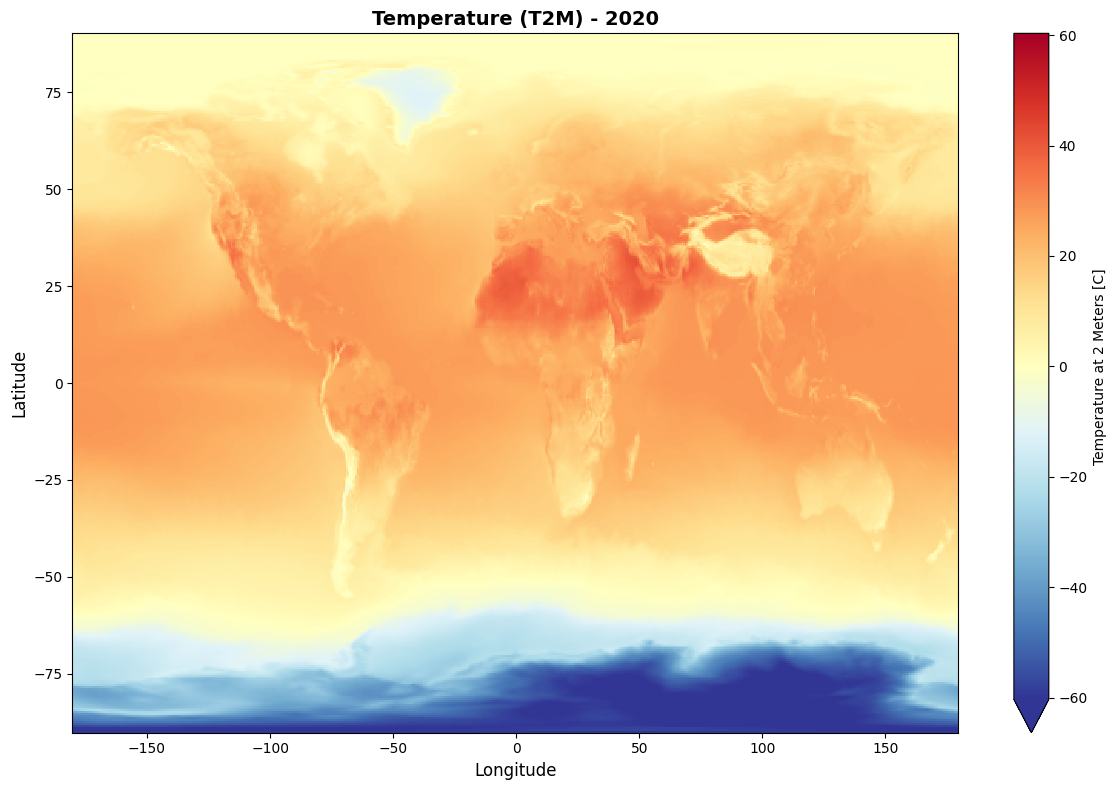

T2M plot complete using metadata: NASA_POWER_2020_croissant.json
   - Data source: s3://nasa-power/merra2/temporal/power_merra2_monthly_temporal_utc.zarr/
   - Time period: 2021-07-01 to 2021-07-31


In [16]:
# T2M Temperature plot using metadata file
import json
import xarray as xr
import matplotlib.pyplot as plt

# Load metadata
with open("NASA_POWER_2021_07_croissant.json", "r") as f:
    metadata = json.load(f)

# Extract Zarr URL from metadata
zarr_url = None
for dist in metadata.get("distribution", []):
    if dist.get("encodingFormat") == "application/x-zarr":
        zarr_url = dist.get("contentUrl")
        break

print(f"Loading data from: {zarr_url}")

# Load data directly from S3
ds = xr.open_zarr(zarr_url, storage_options={"anon": True})

# Extract time range from metadata for subsetting
temporal_extent = metadata.get("geocr:temporalExtent", {})
start_date = temporal_extent.get("startDate", "").split("T")[0]
end_date = temporal_extent.get("endDate", "").split("T")[0]

if start_date and end_date:
    print(f"Subsetting data for {start_date} to {end_date}")
    ds = ds.sel(time=slice(start_date, end_date))

# Plot T2M Temperature
if "T2M" in ds.data_vars:
    fig, ax = plt.subplots(figsize=(12, 8))
    data = ds["T2M"].isel(time=0)
    im = data.plot(ax=ax, cmap="RdYlBu_r", robust=True)
    ax.set_title("Temperature (T2M) - 2020", fontweight="bold", fontsize=14)
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Latitude", fontsize=12)
    plt.tight_layout()
    plt.show()

    print(f"T2M plot complete using metadata: NASA_POWER_2020_croissant.json")
    print(f"   - Data source: {zarr_url}")
    print(f"   - Time period: {start_date} to {end_date}")
else:
    print("Error: T2M variable not found in dataset")